### Random Forest Demo

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
from sklearn.datasets import make_classification

In [5]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [6]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.566790,0.950063,3.360370,-1.646145,1.538439,1
1,0.638920,0.817695,-2.253751,-2.136991,1.935284,0
2,1.634502,0.821425,-0.851869,-1.887624,1.512000,1
3,1.571175,1.142276,-0.424265,-0.922530,1.575085,1
4,-0.648231,0.331733,-0.704950,-1.144823,1.511602,0


#### function for row sampling

In [7]:
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

#### function for column sampling

In [8]:
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

#### function for combined sampling

In [9]:
def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)

##### column and row sampling (combined sampling) ;

In [10]:
df1 = combined_sampling(df,0.5,0.5) # 50%row and 50% column

In [11]:
df2 = combined_sampling(df,0.5,0.5)

In [12]:
df3 = combined_sampling(df,0.5,0.5)

In [13]:
combined_sampling

<function __main__.combined_sampling(df, row_percent, col_percent)>

In [14]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col2', 'col5', 'target'], dtype='object')
Index(['col2', 'col5', 'target'], dtype='object')
Index(['col1', 'col3', 'target'], dtype='object')


In [15]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(50, 3)
(50, 3)
(50, 3)


In [17]:
df1.head()

,col5,col2,target
60,1.007143,0.266637,0
49,1.081894,-0.533127,0
74,0.447185,1.629136,0
74,0.447185,1.629136,0
99,0.387745,0.098873,0


In [18]:
df2.head()

,col1,col3,target
91,-0.164901,0.724576,0
27,-0.946158,-2.296539,1
44,0.806127,-1.647548,1
39,-3.456318,-2.860719,1
56,-1.896794,-0.337999,0


In [19]:
df3.head()

,col5,col1,target
51,0.430891,0.659760,1
41,2.667841,-4.193517,1
11,2.355271,-0.260703,1
60,1.007143,-1.768444,0
79,2.043239,-0.971340,1


In [17]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [18]:
# training all the models

clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [19]:
clf1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [20]:
clf2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [21]:
clf3.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [22]:
from sklearn.tree import plot_tree

[Text(0.375, 0.95, 'col1 <= -0.638\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.25, 0.85, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.5, 0.85, 'col1 <= 2.251\ngini = 0.487\nsamples = 43\nvalue = [18, 25]'),
 Text(0.375, 0.75, 'col2 <= -1.35\ngini = 0.424\nsamples = 36\nvalue = [11, 25]'),
 Text(0.25, 0.65, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.65, 'col2 <= 1.834\ngini = 0.367\nsamples = 33\nvalue = [8, 25]'),
 Text(0.375, 0.55, 'col2 <= 0.075\ngini = 0.312\nsamples = 31\nvalue = [6, 25]'),
 Text(0.25, 0.45, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.5, 0.45, 'col1 <= 0.581\ngini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(0.25, 0.35, 'col1 <= -0.193\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.35, 'col2 <= 0.449\ngini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.625, 0.25, 'col1 <= 1.124\ngini

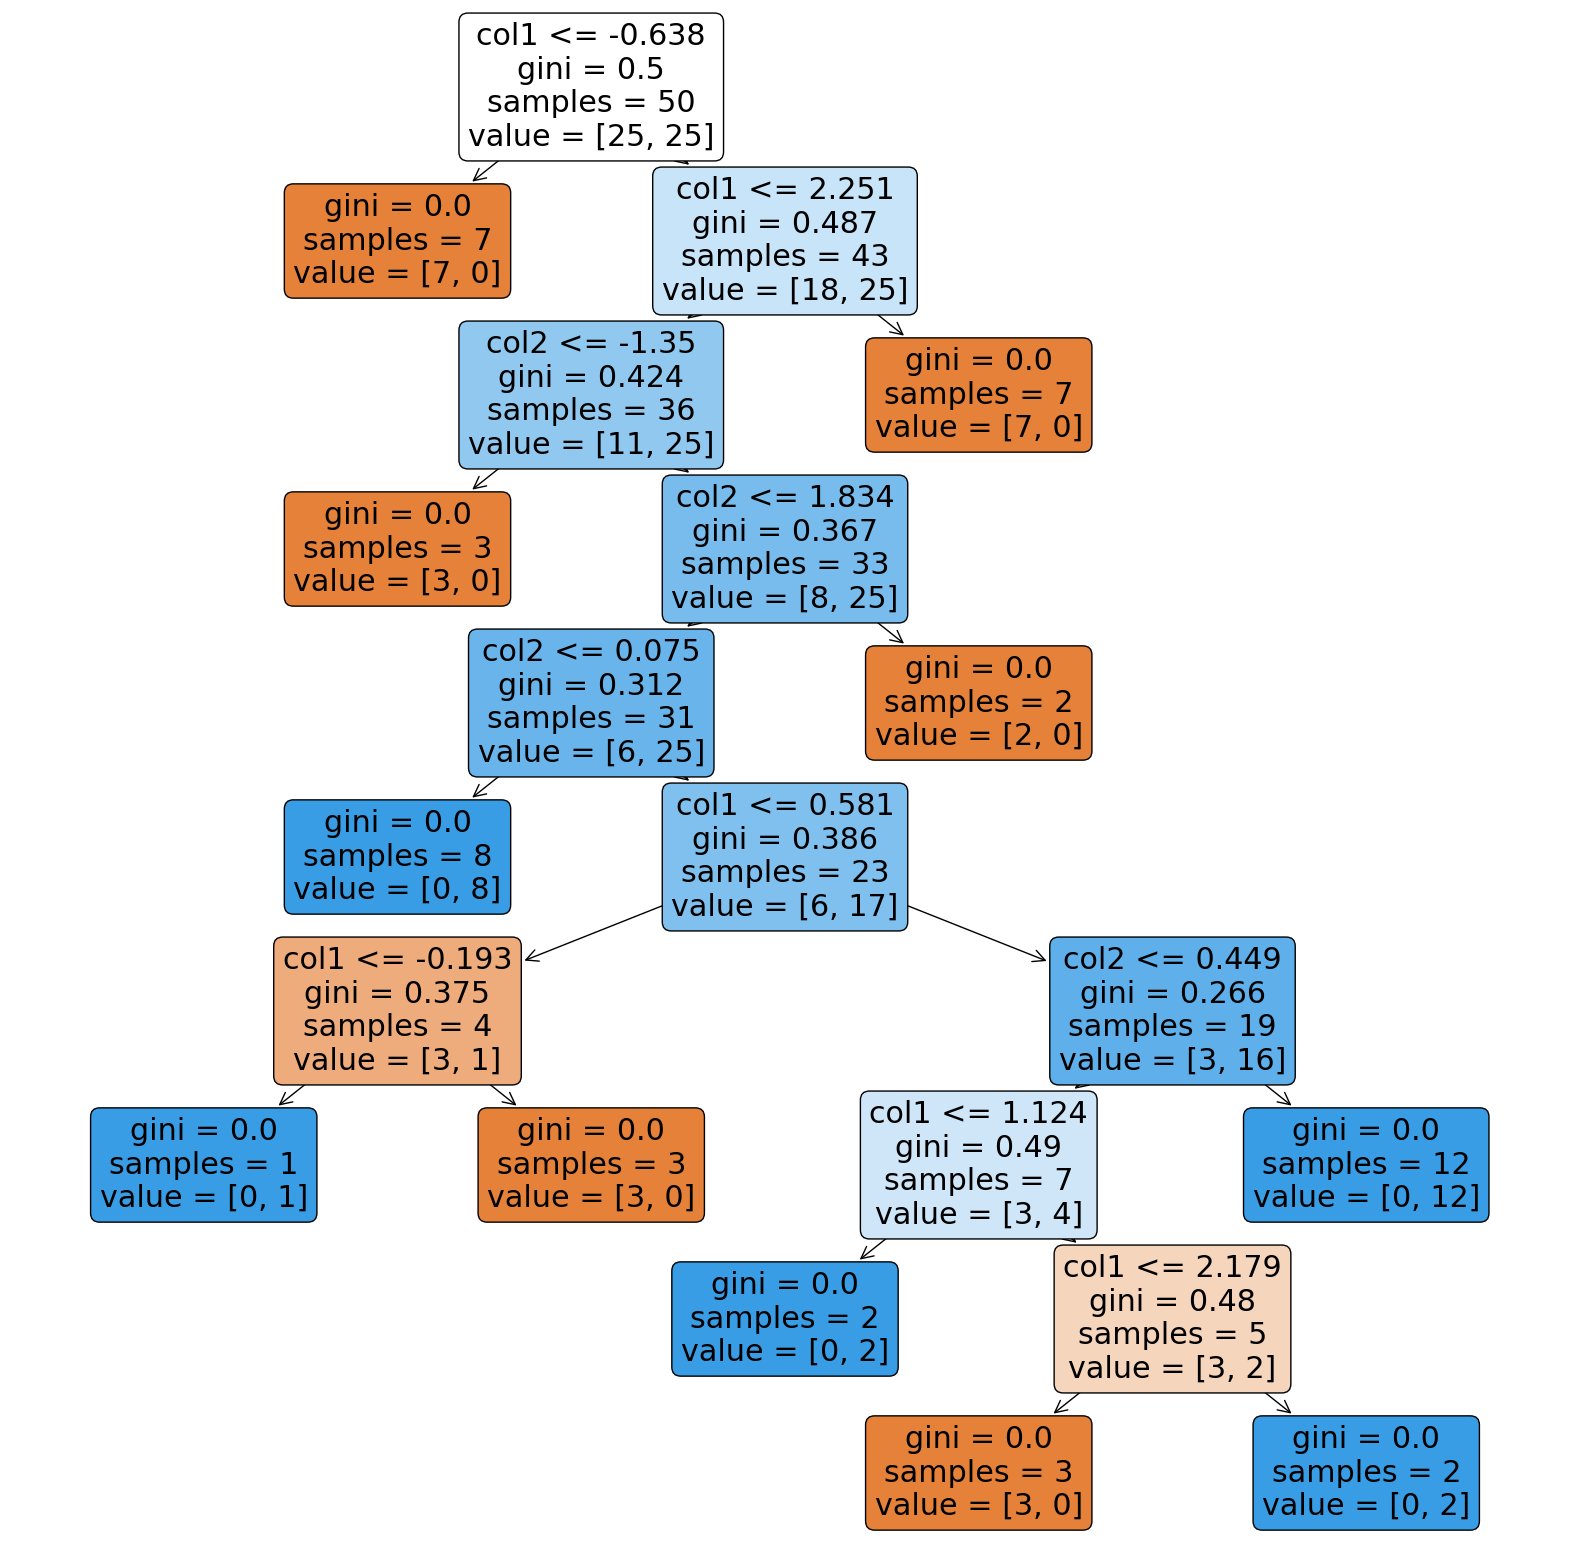

In [23]:
plt.figure(figsize=(20,20))
plot_tree(clf1,filled=True,feature_names=df.columns,rounded=True)

[Text(0.5862068965517241, 0.9583333333333334, 'X[0] <= -0.572\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.5172413793103449, 0.875, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6551724137931034, 0.875, 'X[0] <= 2.008\ngini = 0.458\nsamples = 45\nvalue = [16, 29]'),
 Text(0.5172413793103449, 0.7916666666666666, 'X[1] <= -1.35\ngini = 0.405\nsamples = 39\nvalue = [11, 28]'),
 Text(0.4482758620689655, 0.7083333333333334, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5862068965517241, 0.7083333333333334, 'X[0] <= 1.674\ngini = 0.388\nsamples = 38\nvalue = [10, 28]'),
 Text(0.5172413793103449, 0.625, 'X[0] <= 1.527\ngini = 0.422\nsamples = 33\nvalue = [10, 23]'),
 Text(0.4482758620689655, 0.5416666666666666, 'X[0] <= -0.184\ngini = 0.383\nsamples = 31\nvalue = [8, 23]'),
 Text(0.3793103448275862, 0.4583333333333333, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5172413793103449, 0.4583333333333333, 'X[0] <= 0.087\ngini = 0.417\nsamples = 27\nvalue = [8, 19]'),

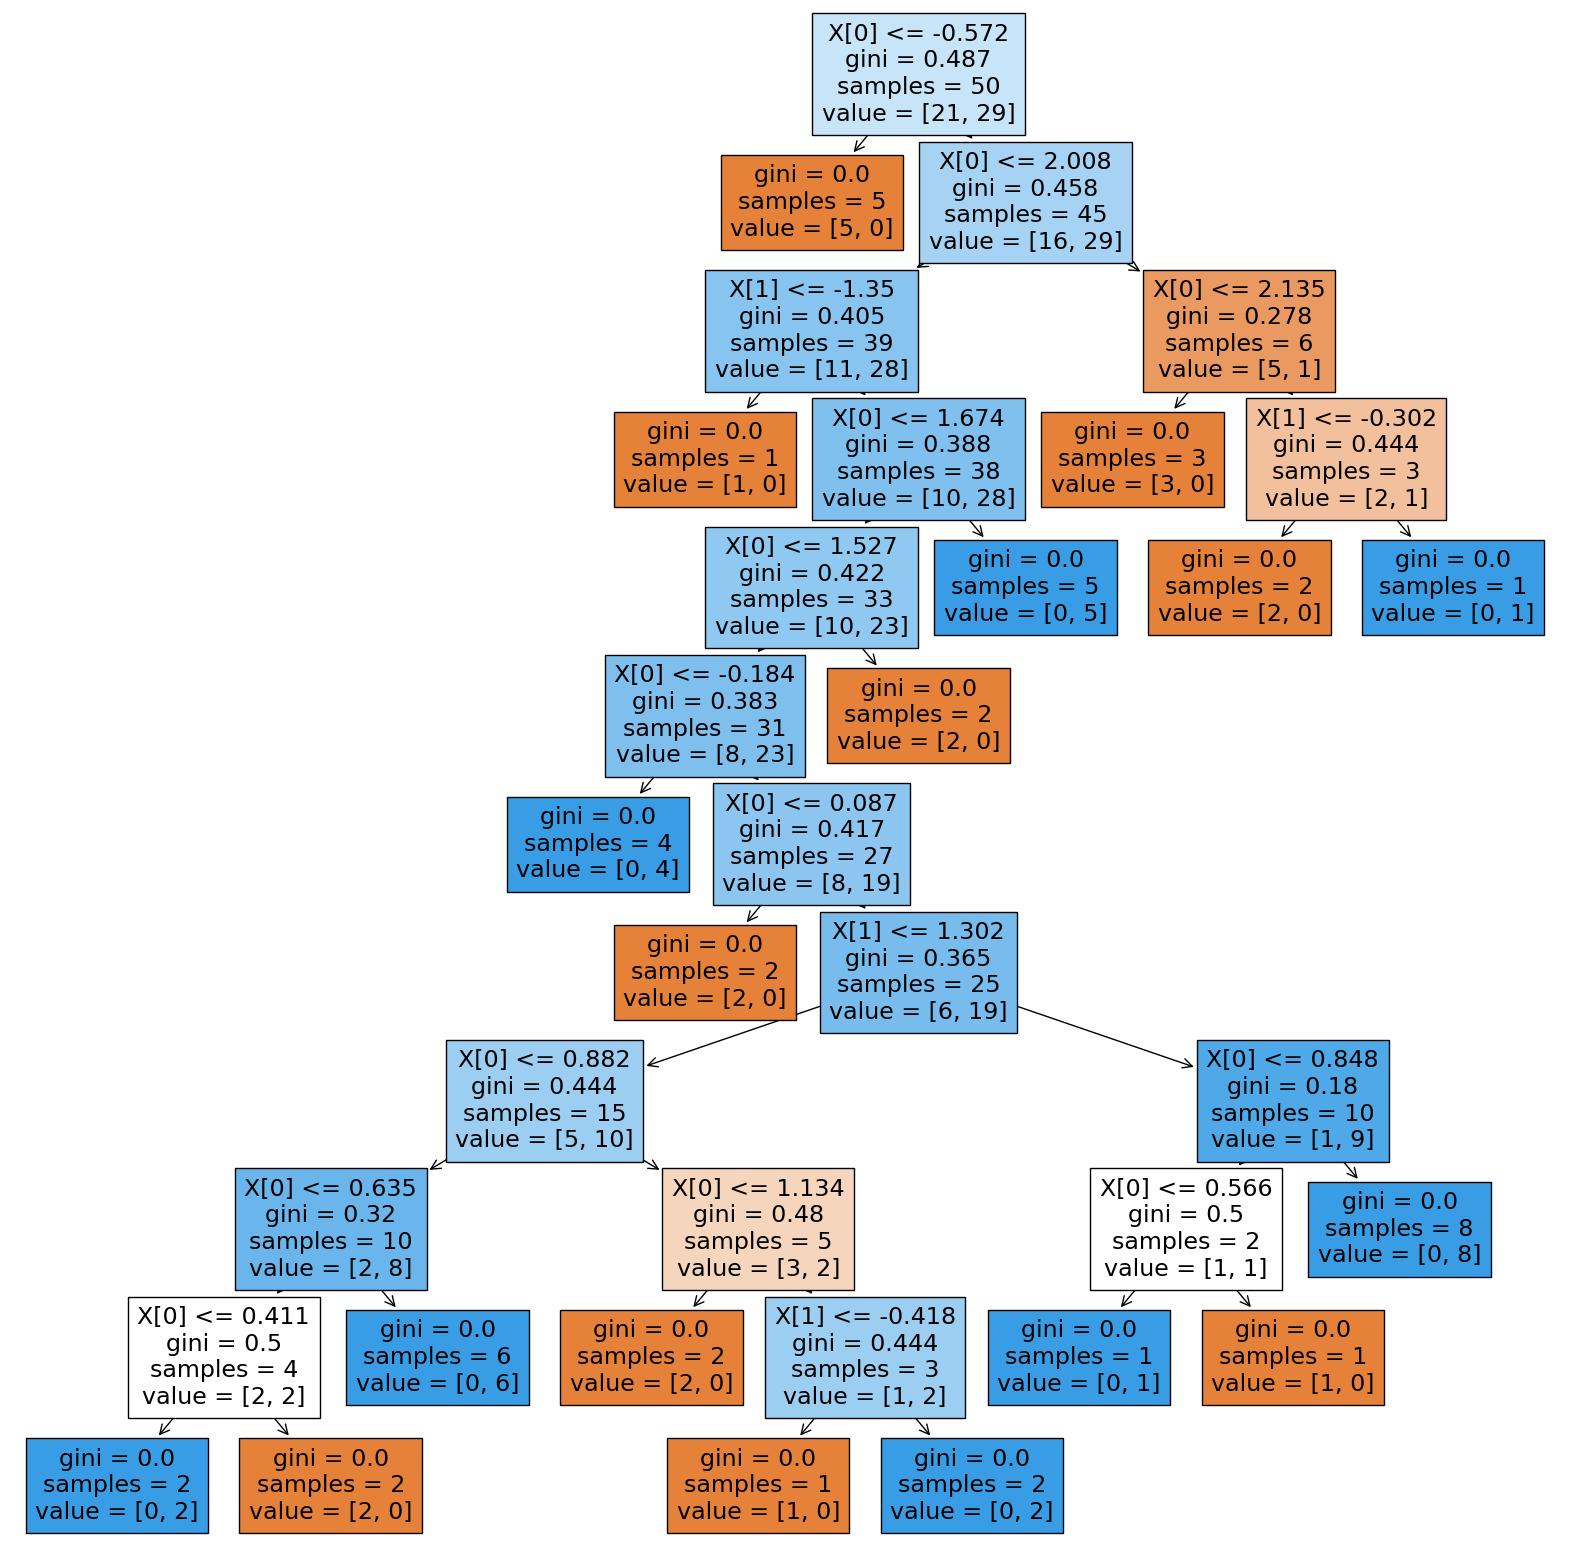

In [24]:
plt.figure(figsize=(20,20))
plot_tree(clf2,filled=True)

[Text(0.4, 0.8333333333333334, 'X[0] <= 0.148\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.6, 0.5, 'X[1] <= -1.374\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]')]

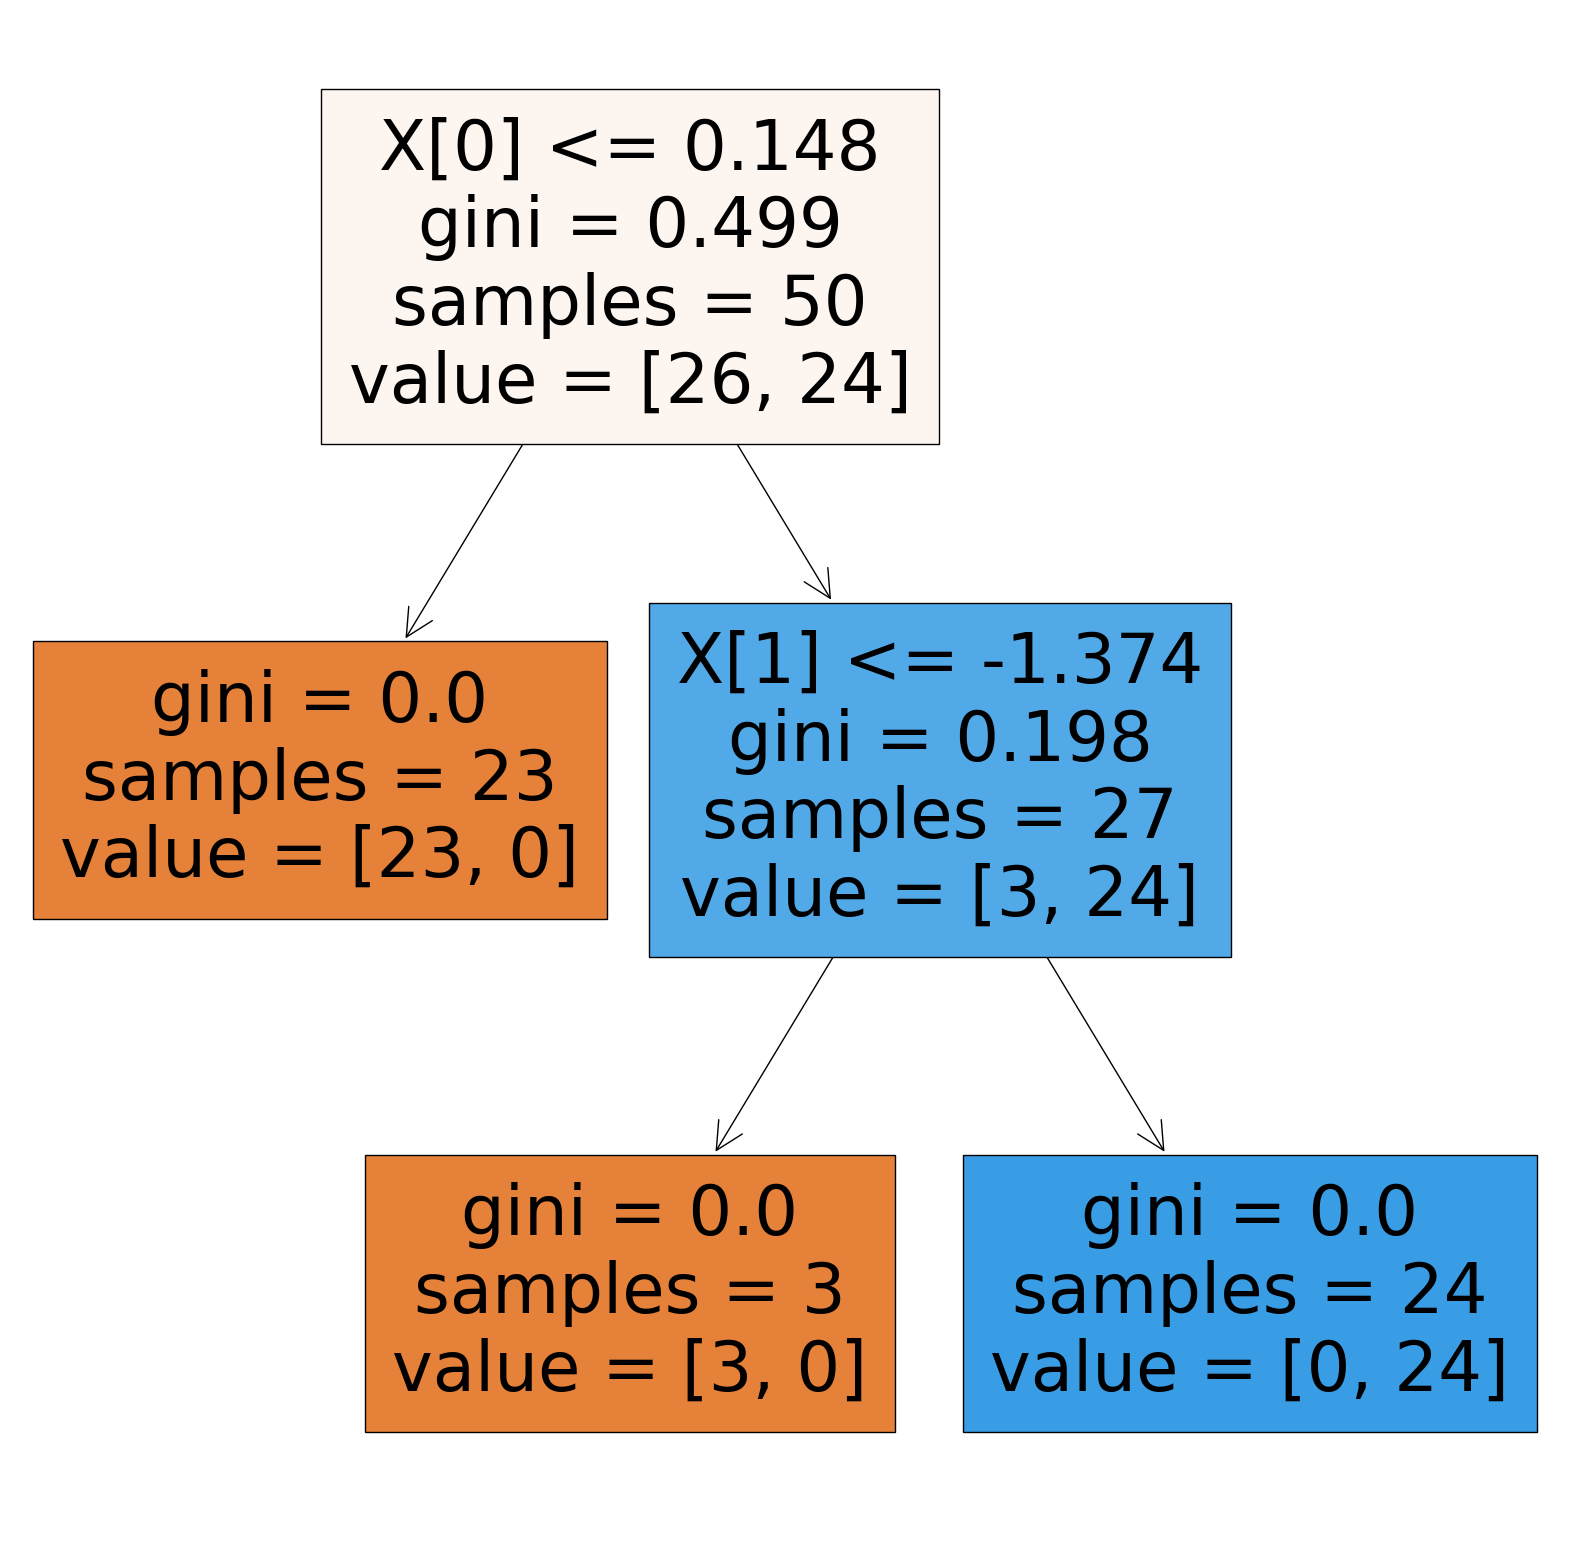

In [25]:
plt.figure(figsize=(20,20))
plot_tree(clf3,filled=True)

In [26]:
clf1.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

array([0])

In [27]:
clf2.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

array([0])

In [28]:
clf3.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

array([0])

In [29]:
np.array([-1.042498,-0.064323]).shape

(2,)

In [30]:
np.array([-1.042498,-0.064323]).ndim

1

In [31]:
print("According to DT1 the result is: ",clf1.predict(np.array([-1.042498,-0.064323]).reshape(1,2)))
print("According to DT2 the result is: ",clf2.predict(np.array([-1.042498,-0.064323]).reshape(1,2)))
print("According to DT3 the result is: ",clf3.predict(np.array([-1.042498,-0.064323]).reshape(1,2)))

According to DT1 the result is:  [0]
According to DT2 the result is:  [0]
According to DT3 the result is:  [0]


So A/Q majority the result is 0. 

***